In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [2]:
#accuracy single decision tree
from sklearn import tree

clfb = tree.DecisionTreeClassifier()
clfb.fit(X_train, y_train)
prediction = clfb.predict(X_test)

clfb.score(X_test, y_test)

0.8881118881118881

In [3]:
#bagging
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [4]:
bag_y_predict = bag_clf.predict(X_test)
bag_clf.score(X_test, y_test)

0.951048951048951

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, bag_y_predict)

0.951048951048951

In [6]:
#radom forest
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=4, bootstrap=False, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

rnd_clf.score(X_test, y_test)

0.972027972027972

In [7]:
#boosting
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=4), n_estimators=500, learning_rate=1.5)

ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.993006993006993

In [13]:
#ROC curve
from sklearn.metrics import roc_curve

rnd_fpr, rnd_tpr, rnd_threshold = roc_curve(y_test, rnd_clf.predict(X_test), drop_intermediate=False)
print(rnd_fpr)
print(rnd_tpr)
print(rnd_threshold)

[0.         0.01886792 1.        ]
[0.         0.96666667 1.        ]
[2 1 0]


In [14]:
ada_fpr, ada_tpr, ada_threshold = roc_curve(y_test, ada_clf.predict(X_test), drop_intermediate=False)
print(ada_fpr)
print(ada_tpr)
print(ada_threshold)

[0. 0. 1.]
[0.         0.98888889 1.        ]
[2 1 0]


In [11]:
def plot_roc_curve(fpr, tpr, threshold=None, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--') #riga tratteggiata diagonale
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')
  plt.legend(loc='lower right')

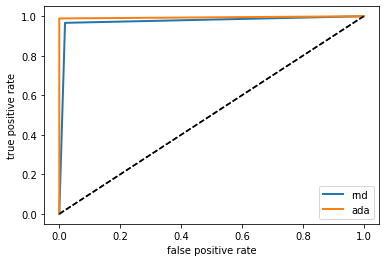

In [17]:
plot_roc_curve(rnd_fpr, rnd_tpr, rnd_threshold, 'rnd')
plot_roc_curve(ada_fpr, ada_tpr, ada_threshold, 'ada')
plt.show()

In [18]:
#area under curve 
from sklearn.metrics import roc_auc_score

print('rnd_auc: ', roc_auc_score(y_test, rnd_clf.predict(X_test)))
print('ada_auc: ', roc_auc_score(y_test, ada_clf.predict(X_test)))

rnd_auc:  0.9738993710691825
ada_auc:  0.9944444444444445


In [19]:
#cross validation

from sklearn.model_selection import cross_val_score

ada_scores = cross_val_score(ada_clf, X_train, y_train, scoring='accuracy', cv=5)
rnd_scores = cross_val_score(ada_clf, X_train, y_train, scoring='accuracy', cv=5)

def display_scores(scores):
  print('Score mean: ', scores.mean())
  print('Score std: ', scores.std())

display_scores(ada_scores)
display_scores(rnd_scores)

Score mean:  0.9671409028727771
Score std:  0.00878346986446568
Score mean:  0.969466484268126
Score std:  0.02053157894716516
